# Range Estimation in Radar using Maximum Likelihood Estimator
Based on *Range Estimation in Radar using Maximum Likelihood Estimator*, H. Sadia et.al.

In [238]:
import numpy as np
import plotly.express as px
from scipy.signal import gausspulse

In [336]:
num_samples = 1000
sample_freq = 1000
sample_period = 1/sample_freq
# t is shifted so that the center is around 0 (ie goes from -x to +x) for pulse shaping
t = (np.arange(num_samples) - num_samples/2) * sample_period

# unshifted version:
t_noshift = np.arange(num_samples) * sample_period

In [319]:
carrier_freq = 20

# How much will the pulse shaping reduce the bandwidth?:
pulse_fractional_bw = 0.2
x = gausspulse(t, carrier_freq, bw=pulse_fractional_bw)

Generate transmit cosine (Fig. 3 in paper).
The paper just uses a simple sinusiod with rectangular pulse (infinite BW), instead we use a gaussian pulse shape which is more realistic.

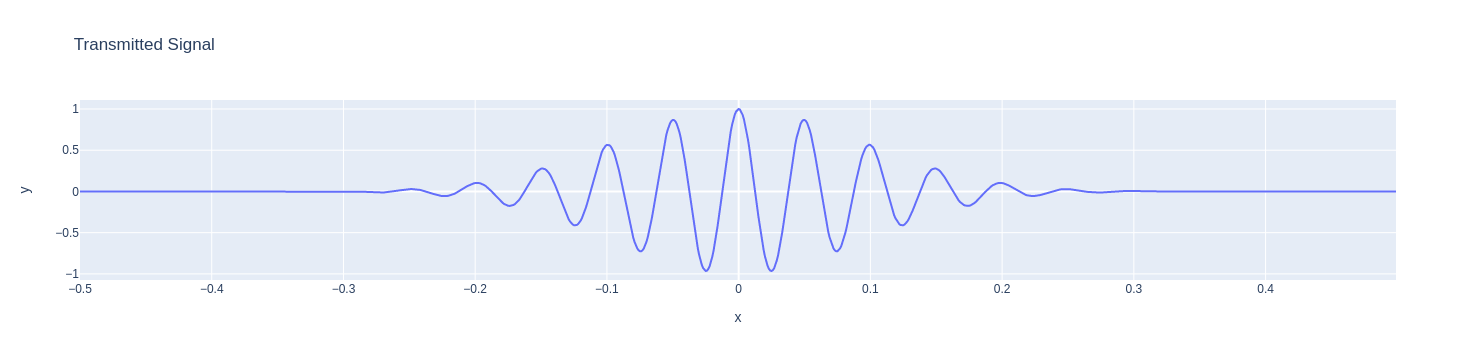

In [320]:
fig = px.line(x=t, y=x, title="Transmitted Signal")
fig.show()

In [450]:
rx_delay_time = 0.345
doppler_multiple = 0.85
rx_delay_samples = rx_delay_time * sample_freq
y = gausspulse(t - rx_delay_time, carrier_freq * doppler_multiple, bw=pulse_fractional_bw)

Generate recieved cosine (Fig. 4 in paper)

Unlike the paper, we also simulate the resulting doppler shift from moving objects. If the shift is within a tolerable range, we still get back the "perfect" delay estimate because it will not effect the maximum value of the correlation below.

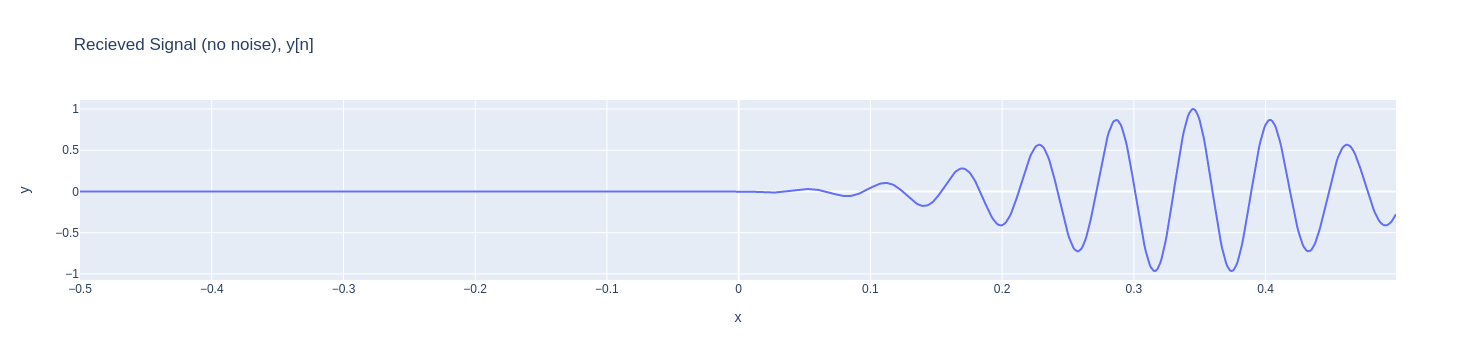

In [451]:
fig = px.line(x=t, y=y, title="Recieved Signal (no noise), y[n]")
fig.show()

In [452]:
awgn = np.random.normal(0, 0.1,  num_samples)
y_awgn = y + awgn

Add AWGN to recieved signal (Fig. 5 in paper). It can tolerate large amounts of AWGN because AWGN has no autocorrelation, and thus will not impact the correlation result at all.

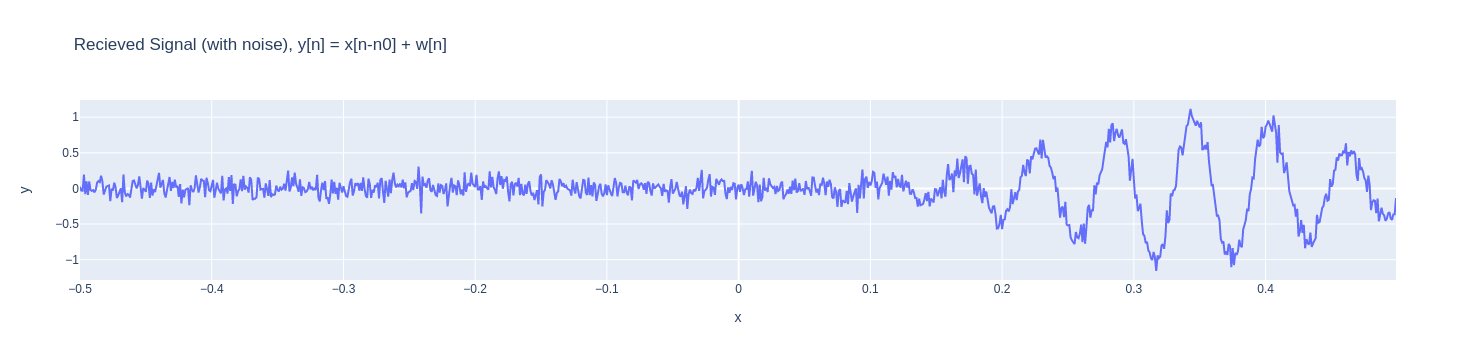

In [453]:
fig = px.line(x=t, y=y_awgn, title="Recieved Signal (with noise), y[n] = x[n-n0] + w[n]")
fig.show()

In [454]:
corr = np.correlate(x, y_awgn, mode="full")[:num_samples]
corr_t = np.arange(len(corr))

Correlation `corr` is equivalent to the $z[n]$ in the paper.

$z[n] = \sum_{n=n_0}^{n_0+M-1} y[n]\cos(\omega_0(n-n_0))$

This is equivalent to cross-correlation, as we are multiplying a signal $y[n]$ with another shifting signal $\cos(\omega_0(n-n_0))$

This should be equivalent to Fig. 6 and Fig. 7 in paper.

Unlike the paper, we are only taking the first half of the correlation `z[n]`. These parts correspond to positive delays. Since there is not situation in which the recieved pulse would come in BEFORE the tx pulse was transmitted (ie. a negative delay), these can be safely ignored.

In [455]:
max_corr = np.argmax(corr)
print("argmax z[n]:", max_corr)
print("Estimated delay:", t_noshift[999 - max_corr])

argmax z[n]: 654
Estimated delay: 0.34500000000000003


In the paper, they recieve a result of max_corr = 100 - delay.

We get max_corr = 99 - delay. I am assuming this is due to MATLAB (used in paper) having 1-indexing??

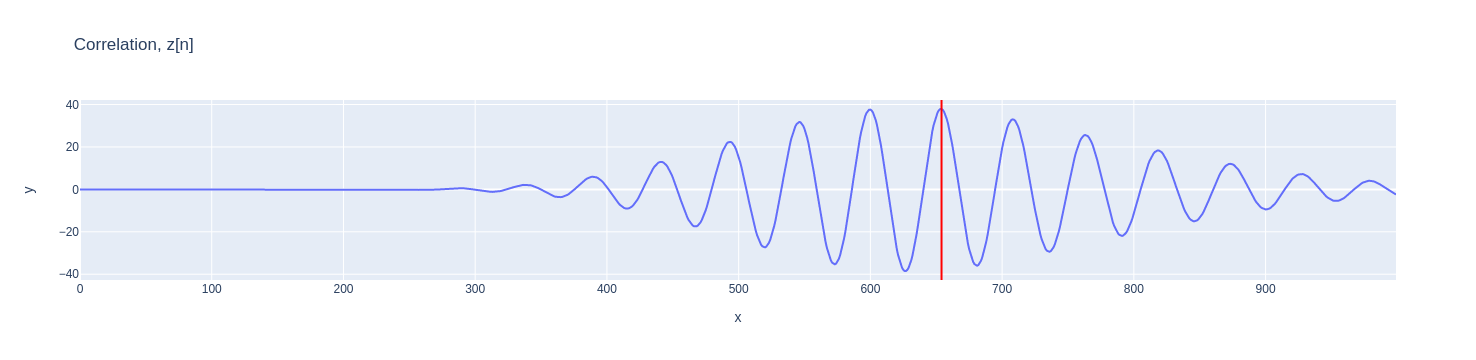

In [456]:
fig = px.line(x=corr_t, y=corr, title="Correlation, z[n]")
fig.add_vline(x=max_corr, line_color="red")
fig.show()